#MEDICAL PREMIUM PREDICTION

#Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/Medicalpremium.csv')
dataset.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
dataset.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


#Cheking missing values

In [ ]:
dataset.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

#Heatmap

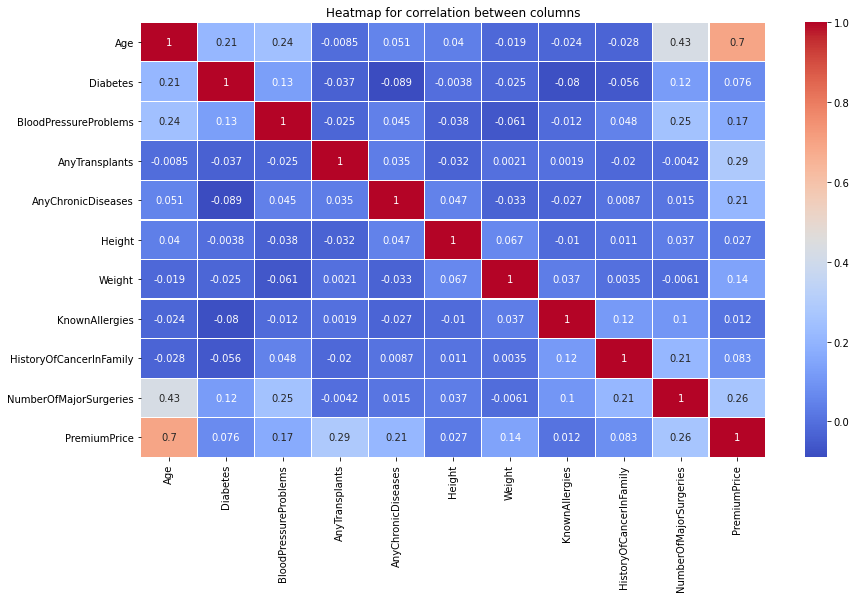

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(dataset.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.title("Heatmap for correlation between columns")
plt.show()

#Initialising the variable

In [ ]:
X = dataset.drop('PremiumPrice',axis=1)
y = dataset.PremiumPrice

#Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
dataset_minmax=pd.DataFrame(min_max.fit_transform(dataset),columns=dataset.columns)
dataset_minmax.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,0.562500,0.0,0.0,0.0,0.0,0.232558,0.074074,0.0,0.0,0.000000,0.40
1,0.875000,1.0,0.0,0.0,0.0,0.813953,0.271605,0.0,0.0,0.000000,0.56
2,0.375000,1.0,1.0,0.0,0.0,0.302326,0.098765,0.0,0.0,0.333333,0.32
3,0.708333,1.0,1.0,0.0,1.0,0.883721,0.518519,0.0,0.0,0.666667,0.52
4,0.416667,0.0,0.0,0.0,1.0,0.488372,0.456790,0.0,0.0,0.333333,0.32


#Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Training the dataset using linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Testing

In [ ]:
y_pred = multiple_reg.predict(X_test)

#Calculating the coefficients

In [ ]:
multiple_reg.coef_

array([ 330.75363081, -386.17073412,  289.04694182, 7275.6881883 ,
       2787.94139413,   -9.08183154,   66.42704556,  343.28036754,
       2183.22830822, -638.82932302])

#Calculating the intercept

In [ ]:
multiple_reg.intercept_

6072.119237054227

#Calculating the R squared value

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.610368716071813

#Predicting new values

In [ ]:
output = multiple_reg.predict([[45,0,0,0,0,155,57,0,0,0]])
output

array([23334.69033177])

In [ ]:
output = multiple_reg.predict([[38,1,1,1,1,166,88,0,1,1]])
output

array([34489.65795682])